In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/dataset/austin_weather.csv')

In [ ]:
print("Data types before conversion:")
print(df.info())

In [3]:
numeric_cols = ['DewPointHighF', 'DewPointAvgF', 'DewPointLowF',
                'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
                'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
                'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
                'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [4]:
print("\nData types after conversion:")
print(df.info())


Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1312 non-null   float64
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  Vis

In [5]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df = df.round(2)


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.to_csv('../data/processed_data/clean_data.csv', index=False)

In [8]:
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

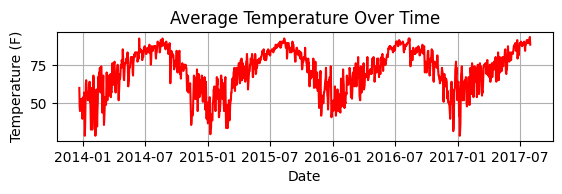

In [9]:
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['TempAvgF'], color='red')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.grid(True)


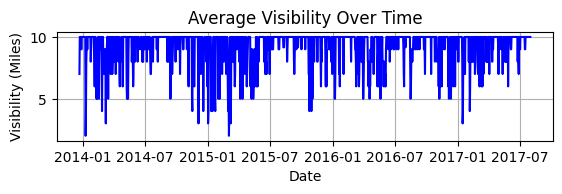

In [10]:
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['VisibilityAvgMiles'], color='blue')
plt.title('Average Visibility Over Time')
plt.xlabel('Date')
plt.ylabel('Visibility (Miles)')
plt.grid(True)

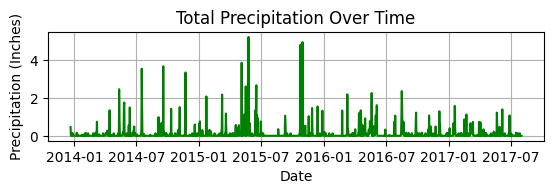

In [11]:
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['PrecipitationSumInches'], color='green')
plt.title('Total Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.grid(True)

In [12]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [13]:
summary_stats = df[['TempAvgF', 'VisibilityAvgMiles', 'PrecipitationSumInches']].describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
          TempAvgF  VisibilityAvgMiles  PrecipitationSumInches
count  1319.000000         1319.000000             1319.000000
mean     70.642911            9.162183                0.126619
std      14.045904            1.452227                0.426586
min      29.000000            2.000000                0.000000
25%      62.000000            9.000000                0.000000
50%      73.000000           10.000000                0.000000
75%      83.000000           10.000000                0.080000
max      93.000000           10.000000                5.200000


                            TempHighF  TempAvgF  TempLowF  DewPointHighF  \
TempHighF                    1.000000  0.970655  0.881977       0.808819   
TempAvgF                     0.970655  1.000000  0.968573       0.878455   
TempLowF                     0.881977  0.968573  1.000000       0.899268   
DewPointHighF                0.808819  0.878455  0.899268       1.000000   
DewPointAvgF                 0.804990  0.892098  0.929988       0.966014   
DewPointLowF                 0.761680  0.860885  0.912875       0.894530   
HumidityHighPercent          0.143485  0.215144  0.276410       0.522422   
HumidityAvgPercent          -0.109208  0.032423  0.176902       0.408909   
HumidityLowPercent          -0.252948 -0.092157  0.079513       0.259335   
SeaLevelPressureHighInches  -0.675968 -0.694079 -0.670944      -0.704942   
SeaLevelPressureAvgInches   -0.614603 -0.622687 -0.593744      -0.668394   
SeaLevelPressureLowInches   -0.534357 -0.536999 -0.507659      -0.607674   
VisibilityHi

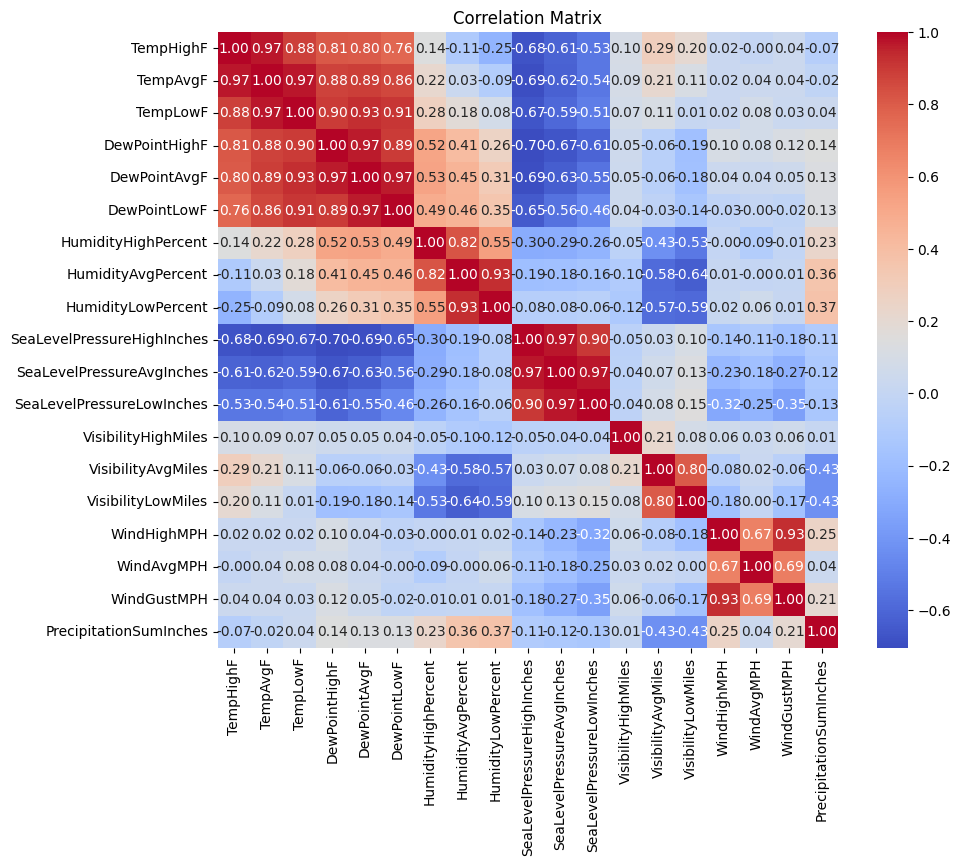

In [14]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()